<a href="https://colab.research.google.com/github/mfWesterhouse/Project119/blob/main/project119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving project119.csv to project119.csv


In [2]:
import pandas as pd

names = ['ID', 'Pclass', 'Sex', 'Age', 'Sibsp', 'Parch', 'Survived']

df = pd.read_csv('project119.csv', names=names).iloc[1:]

print(df.head())

  ID Pclass Sex   Age Sibsp Parch Survived
1  1      3   1  34.5     1     0        0
2  2      1   0    47     1     0        1
3  3      3   0    62     0     0        1
4  4      1   0    27     1     0        1
5  5      3   1    22     0     0        0


In [3]:
features = ['Pclass', 'Sex', 'Age']
X = df[features]
y = df['Survived']

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

clf = DecisionTreeClassifier()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.7713004484304933


In [5]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<Sex &le; 0.5<br/>gini = 0.474<br/>samples = 668<br/>value = [410, 258]<br/>class = 0>, fillcolor="#f5d0b6"] ;
1 [label=<Pclass &le; 2.5<br/>gini = 0.372<br/>samples = 231<br/>value = [57, 174]<br/>class = 1>, fillcolor="#7abdee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Age &le; 0.415<br/>gini = 0.116<br/>samples = 129<br/>value = [8, 121]<br/>class = 1>, fillcolor="#46a3e7"] ;
1 -> 2 ;
3 [label=<Pclass &le; 1.5<br/>gini = 0.375<br/>samples = 16<br/>value = [4, 12]<br/>class = 1>, fillcolor="#7bbeee"] ;
2 -> 3 ;
4 [label=<gini = 0.245<br/>samples = 7<br/>value = [1, 6]<br/>class = 1>, fillcolor="#5aade9"] ;
3 -> 4 ;
5 [label=<gini = 0.444<br/>samples = 9<br/>value = [3, 6]<br/>class = 1>, fillcolor="#9ccef2"] ;
3 -> 5 ;
6 [label=<Age &le; 45.25<br/>gini = 0.068<br/>samples = 113<br/>value = [4, 109]<br/>class = 1>, fill

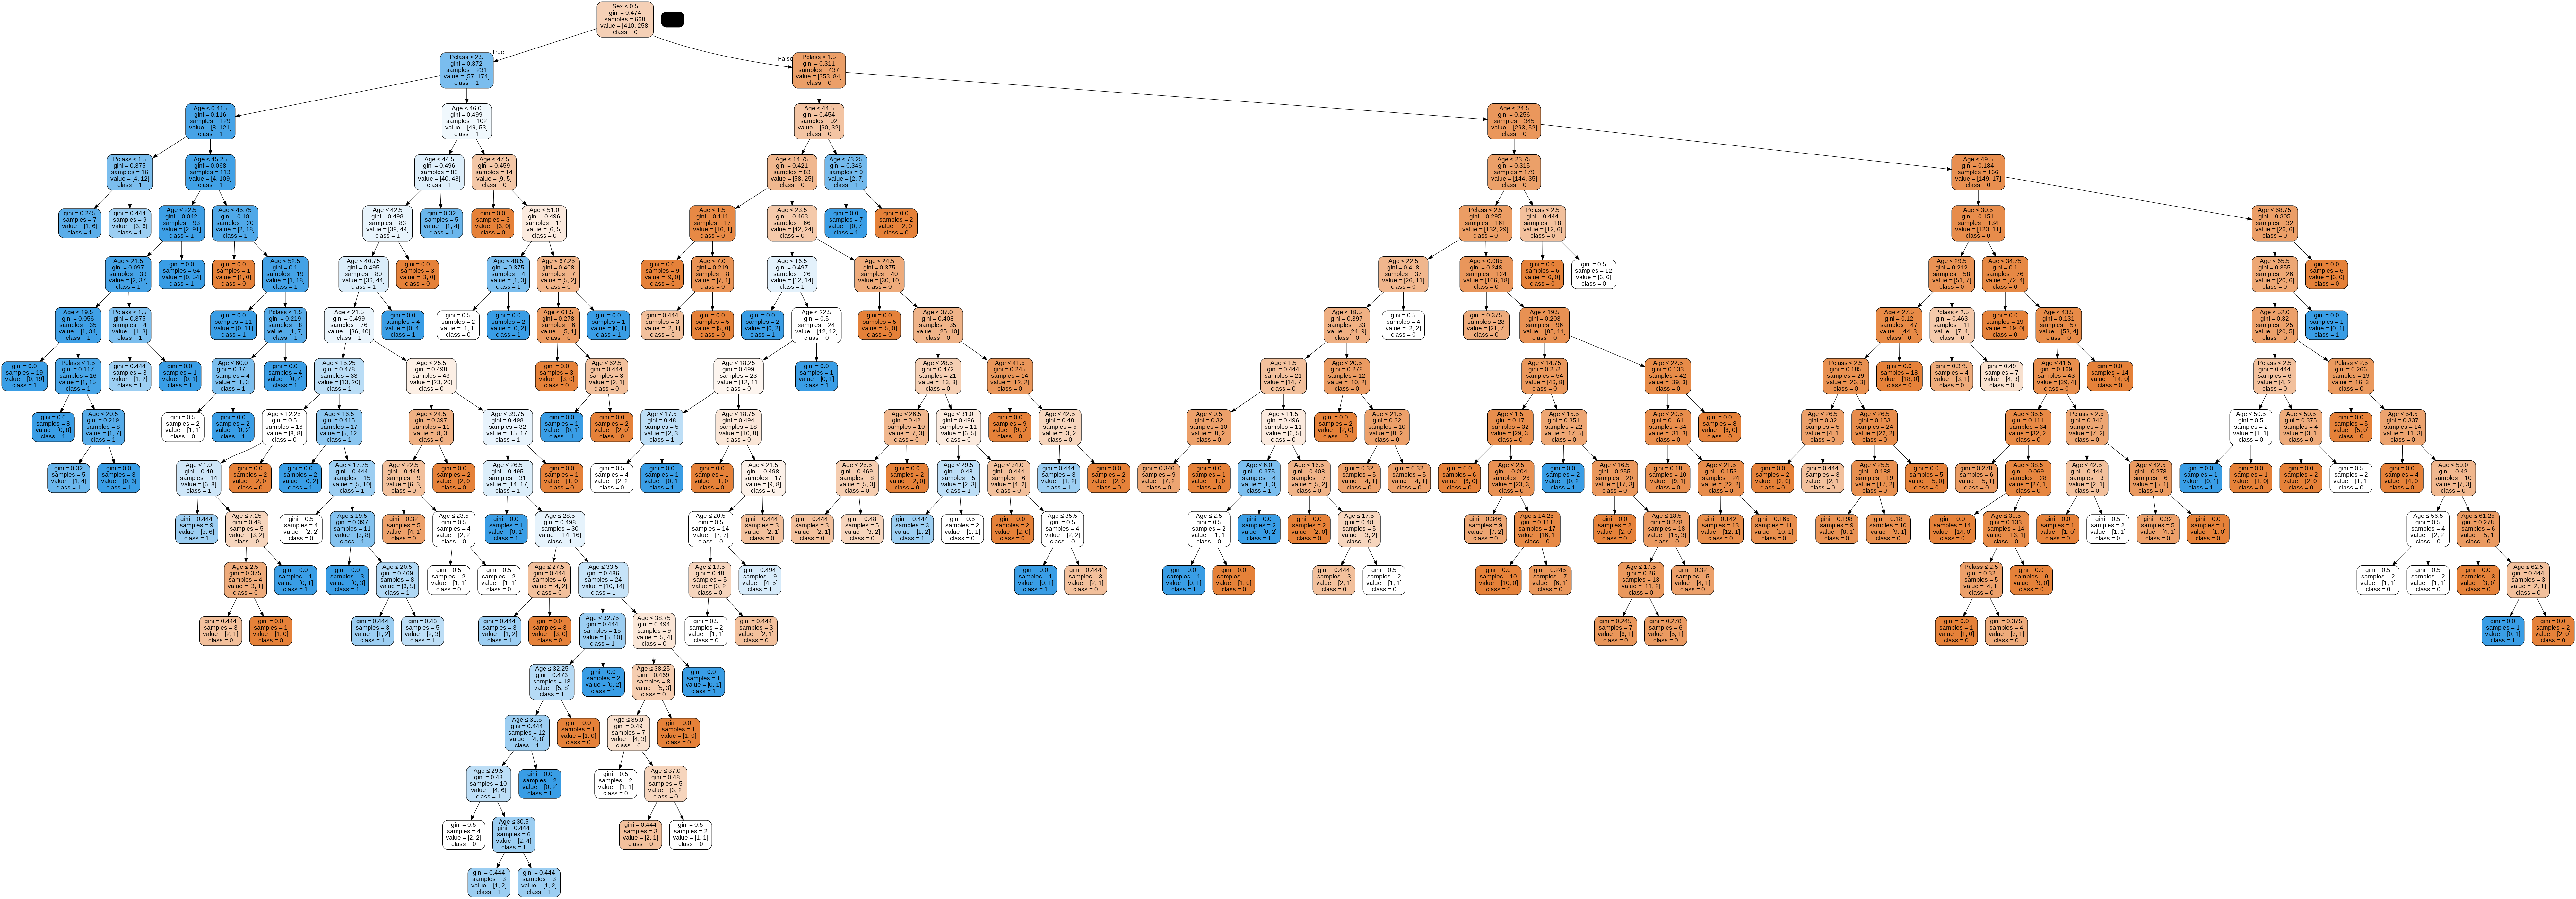

In [6]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('boats.png')
Image(graph.create_png())

In [7]:
clf = DecisionTreeClassifier(max_depth=3)

clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.7847533632286996


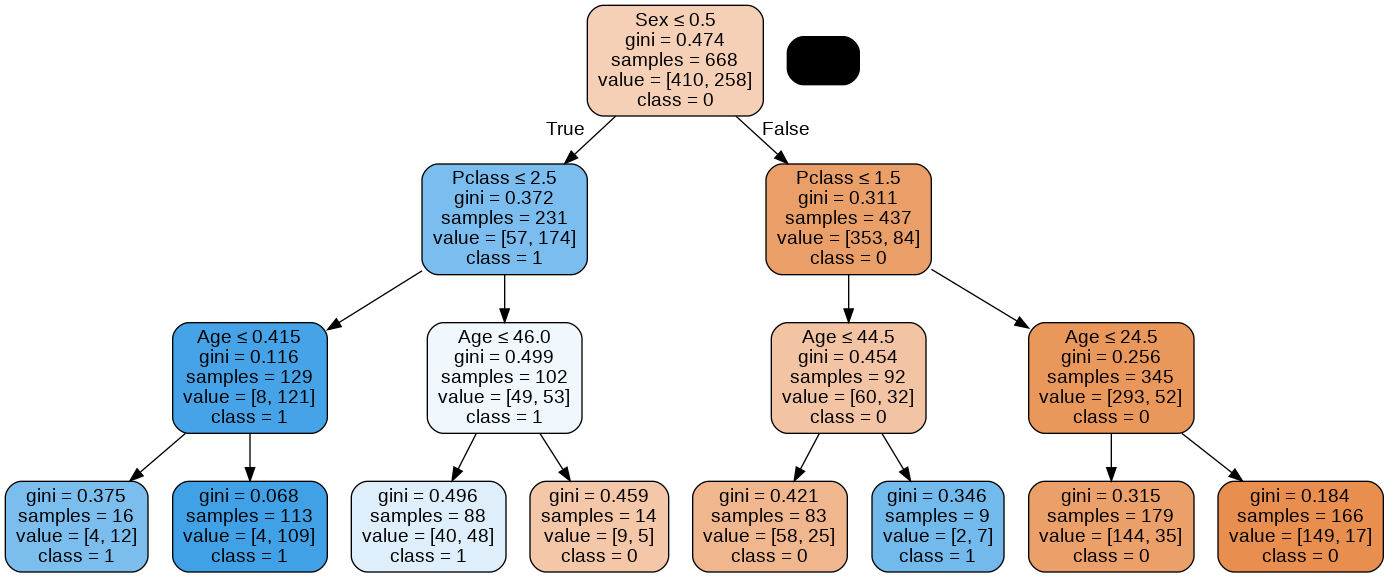

In [8]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('boats.png')
Image(graph.create_png())